# Divertindo-se com SkyCoord

Esse roteiro foi feito para usuários Linux e espera-se que seja útil e prático. 

A classe SkyCoord é uma ferramenta simples de representação de coordenadas celestes, onde é possível a manipulação e transformação de sistemas de coordenadas. Suas principais definições são:
União de atributos dos quadros de coordenadas definidos pelo usuário astropy.coordinates.frame_transform_graph;
É muito flexível com a entrada de dados e
Tem métodos convencionais para análise.
Para maiores informações : http://docs.astropy.org/en/stable/coordinates/skycoord.html

O objetivo deste trabalho é fazer uma representação simples de objetos astronômicos na esfera celeste. Para isso será necessário que se tenha uma tabela em formato txt, informando a ascensão reta e declinação dos objetos. 
Vamos as ferramentas que iremos utilizar:

O primeiro passo é instalar o Astropy (para isso é necessário o Python 2.7 ou posterior e o Numpy 1.7 ou posterior). Com o Anaconda, basta dar update pelo terminal com o comando:

username:~$conda update astropy

Outra forma, também pelo terminal, é utilizar o pip

username:~$pip install --no-deps astropy

Então, já no programa, você importa o SkyCoord de um pacote para conversão de coordenadas celestes, o Astronomical Coordinates System. A classe SkyCoord é a forma mais simples para utilizar essas coordenadas, como mostrado no exemplo abaixo.


In [2]:
from astropy import units as u       #importações necessárias 
from astropy.coordinates import SkyCoord
from astropy.coordinates import  FK4
import numpy as np

tabela = np.loadtxt("Acker-PNs.txt",str, skiprows=38) # Leitura da tabela em formato de string

x=np.zeros(len(tabela),float) # vetor que irá armazenar a ascensão reta
y=np.zeros(len(tabela),float)   # vetor que irá armazenar a declinação 

Para que os dados da tabela sejam lidos com um formato específico (que é: “00 01 15.79    -25 48 07.67 “), coloca-se o “join” dentro do for. Posteriormente, transformamos a ascensão reta que estava em horas, minutos e segundos em ângulos e depois em radianos, para a declinação que já está em ângulo transformamos em radianos. 


In [3]:
for n in range(len(tabela)):          # Loop para leitura de todos elementos da tabela
    
    # Juntando os elementos da linha
    coords = ' '.join(tabela[n,:])   
    
    # definindo o elemento, formato do ambiente gráfico que deseja, unidades 
    # dos elementos e precessão do elementos para uma dada convenção de J.
    sc = SkyCoord(coords, frame=FK4, unit=(u.hour, u.deg), obstime="J2000") 
    
    # O SkyCoord irá fornecer dados com diversas informações, mas queremos 
    # somente a parte que está contida a ascensão reta logo, sc.ra:
    ra_rad= sc.ra.wrap_at(180*u.deg).radian 
    
    # queremos a parte que tem a declinação, então, sc.dec
    dec_rad= sc.dec.radian 
    
    # guardando a ascensão reta e declinação
    x[n]=ra_rad 
    y[n]=dec_rad 

Para fazer finalmente o gráfico com projeção aitoff usamos:

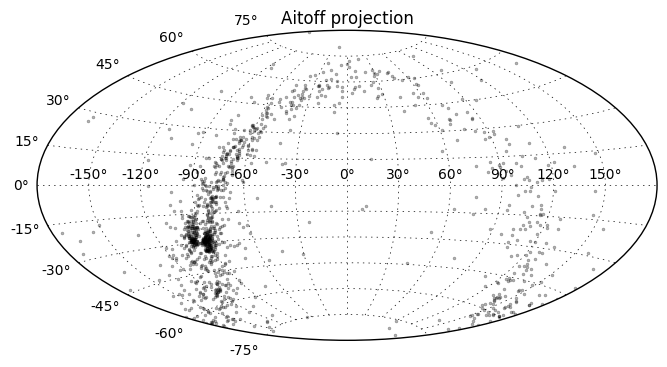

In [6]:
import matplotlib.pyplot as plt # importando ambiente gráfico 

plt.figure(figsize=(8,4.2))                               # definindo tamanho da figura
plt.subplot(111, projection="aitoff")                     # definindo o formato da projeção 

plt.title("Aitoff projection")                            # título do gráfico 
plt.grid(True)

plt.plot(x ,y,'o',color='black', markersize=2, alpha=0.3) # (pontos, formato do ponto, cor do ponto, tamanho do ponto e degradê do ponto )
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()                                                # mostrar o gráfico fora do console 

# Referências:  

http://docs.astropy.org/en/stable/install.html  
http://docs.astropy.org/en/stable/coordinates/skycoord.html
